In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
from scipy.stats import skew

In [2]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = pd.DataFrame(boston.target)

In [3]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
features.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [5]:
features.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
dtype: float64

### The mean of data is greater than median, It suggest that our dataset is rightly skewed or has right side skeweness

skewness 5.207652387859715


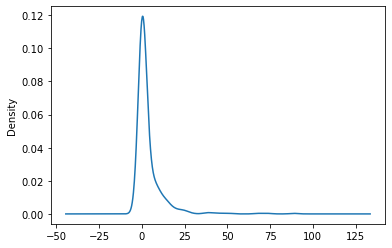

In [6]:
print('skewness',skew(features['CRIM']))
features['CRIM'].plot.kde()

#### Correlation with target variable

In [7]:
data = pd.concat([features,targets],axis=1)

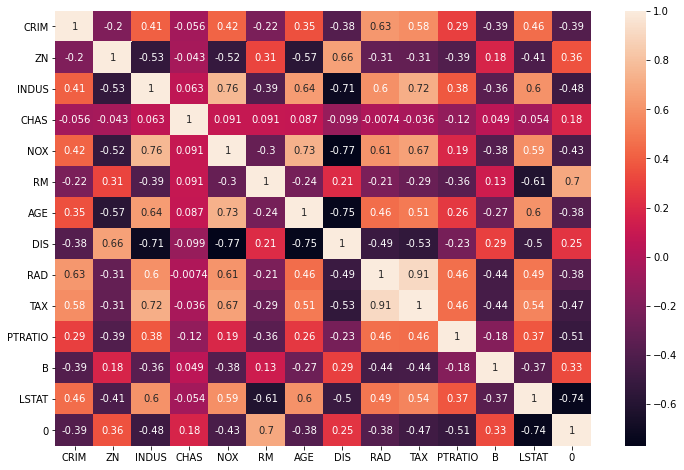

In [8]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(12,8)) 
sns.heatmap(corr,annot=True,ax=ax)

In [9]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Text(0.5, 0, 'CRIM')

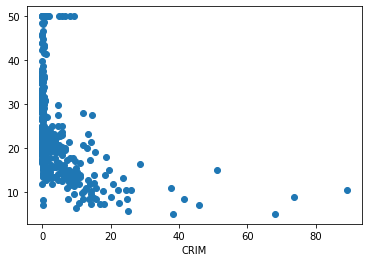

In [10]:
plt.scatter(features['CRIM'],targets)
plt.xlabel('CRIM')

In [11]:
features['CRIM'].isnull().sum()

0

#### Reducing the skewness

In [12]:
print('1_skewness',skew(features['CRIM']))

1_skewness 5.207652387859715


In [13]:
features['CRIM'] = np.sqrt(features['CRIM'])
print('2_skewness',skew(features['CRIM']))

2_skewness 2.018376021915564


skewness 2.018376021915564


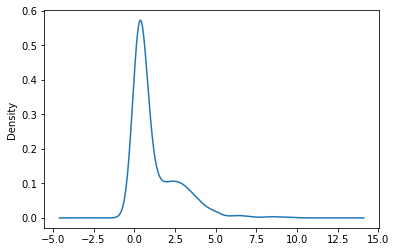

In [14]:
print('skewness',skew(features['CRIM']))
features['CRIM'].plot.kde()

In [15]:
features['CRIM'] = np.sqrt(features['CRIM'])
print('3_skewness',skew(features['CRIM']))

3_skewness 1.091621744475503


skewness 1.091621744475503


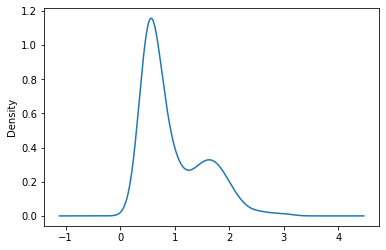

In [16]:
print('skewness',skew(features['CRIM']))
features['CRIM'].plot.kde()

Text(0.5, 0, 'CRIM')

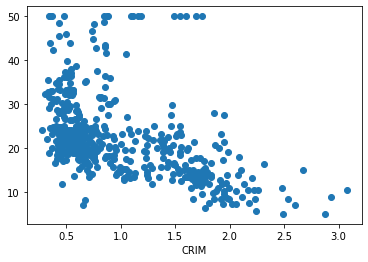

In [17]:
plt.scatter(features['CRIM'],targets)
plt.xlabel('CRIM')

In [18]:
for (columnName, columnData) in features.iteritems():
    print(str(columnName) +" Skewness Value - "+ str(skew(columnData)))

CRIM Skewness Value - 1.091621744475503
ZN Skewness Value - 2.219063057148425
INDUS Skewness Value - 0.29414627684418543
CHAS Skewness Value - 3.395799292642519
NOX Skewness Value - 0.7271441597740319
RM Skewness Value - 0.40241466802496245
AGE Skewness Value - -0.5971855948016143
DIS Skewness Value - 1.0087787565152246
RAD Skewness Value - 1.0018334924536951
TAX Skewness Value - 0.6679682687237768
PTRATIO Skewness Value - -0.7999445320367449
B Skewness Value - -2.8817983452627716
LSTAT Skewness Value - 0.9037707431346133


In [19]:
features['ZN'] = np.sqrt(features['ZN'])  
print(skew(features['ZN']))

1.4719128590626676


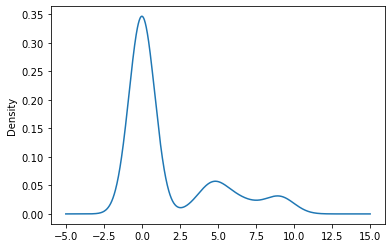

In [20]:
features['ZN'].plot.kde()

In [21]:
features['CHAS'] = np.sqrt(features['CHAS'])  
print(skew(features['CHAS']))

3.395799292642519


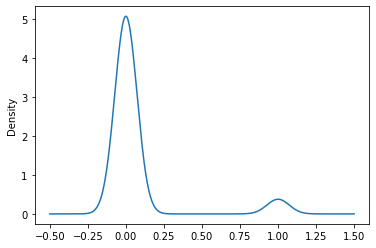

In [22]:
features['CHAS'].plot.kde()

In [23]:
features['DIS'] = np.sqrt(features['DIS'])  
print(skew(features['DIS']))

0.5627492698735238


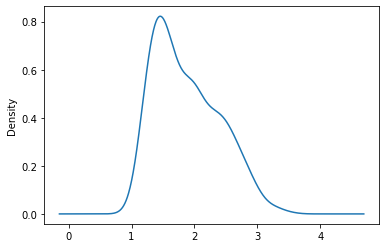

In [24]:
features['DIS'].plot.kde()

In [25]:
features['RAD'] = np.sqrt(features['RAD'])  
print(skew(features['RAD']))

0.8213996403008884


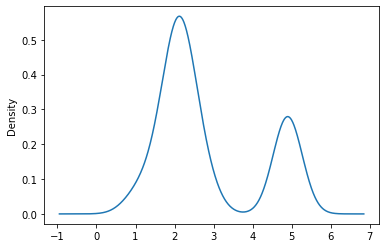

In [26]:
features['RAD'].plot.kde()

In [27]:
data = pd.concat([features,targets],axis=1)
corr = data.corr()

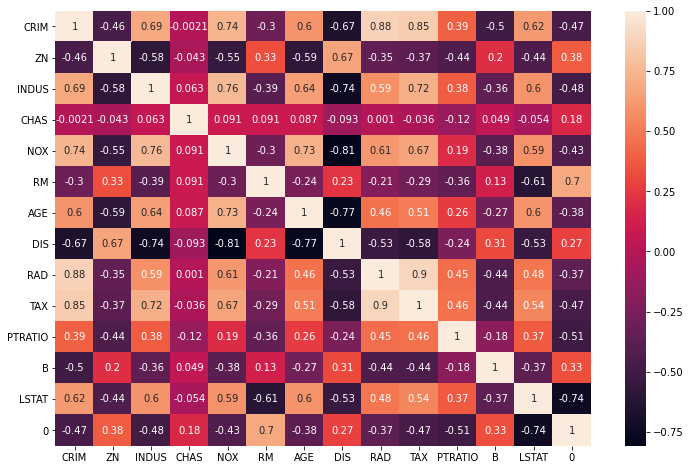

In [28]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.heatmap(corr,annot=True,ax=ax)

#### Feature Selection Techniques

In [29]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#### Backward Elimination using OLS model# 

In [30]:
#Backward Elimination
cols = list(features.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = features[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(targets,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print('best features', selected_features_BE)

best features ['ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [31]:
X = features[['CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

###  Normalizing using StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
scaled_data = scaler.fit_transform(X)

In [34]:
scaled_data

array([[-0.27259857, -0.14421743,  0.41367189, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.27259857, -0.74026221,  0.19427445, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.27259857, -0.74026221,  1.28271368, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.27259857,  0.15812412,  0.98496002, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.27259857,  0.15812412,  0.72567214, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.27259857,  0.15812412, -0.36276709, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, targets, test_size=0.33, random_state=42)

### Model Building

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
model=RandomForestRegressor(n_estimators=100)

In [38]:
model.fit(X_train,y_train)

<ipython-input-38-b7a8c64777c1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor()

In [39]:
y_pred=model.predict(X_test)


In [40]:
#Determine Performance Metrics

# Calculate the absolute errors
errors = abs(y_pred - np.array(y_test))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.array(y_test))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 53.84 %.


In [42]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.184760479041916
Mean Squared Error: 10.297588161676646
Root Mean Squared Error: 3.2089855346630416


### Hyperparameter Tunning 

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [45]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [46]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\RAHUL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [47]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [48]:
best_random = rf_random.best_estimator_
best_random.fit(X_train, y_train)

<ipython-input-48-468a4b046a28>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_random.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=500)

In [49]:
y_pred=best_random.predict(X_test) 


In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.0226019969409026
Mean Squared Error: 9.749009761384478
Root Mean Squared Error: 3.122340430091581


In [51]:
print('Testing Accuracy-',best_random.score(X_test, y_test)*100)

Testing Accuracy- 87.11786216318967
